In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt



In [2]:
img_rgb = cv2.imread('./1.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./test.png', 0)
h, w = template.shape[::] 


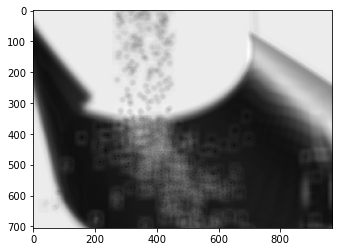

In [3]:


#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

cv2.imshow("Matched image", img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

       


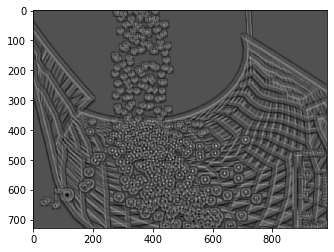

In [8]:
### Template matching - multiple objects

#For multiple occurances, cv2.minMaxLoc() won’t give all the locations
#So we need to set a threshold
    
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('./5.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./test2.png',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.5 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc. 

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  #Red rectangles with thickness 2. 

#cv2.imwrite('images/template_matched.jpg', img_rgb)
cv2.imshow("Matched image", img_rgb)
cv2.imwrite('Matched_img.jpg', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
import cv2
import numpy as np

# read image
img = cv2.imread('./1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./test.png',0)


In [40]:
# run template matching, get minimum val
res = cv2.matchTemplate(gray, template, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# create threshold from min val, find where sqdiff is less than thresh
min_thresh = (min_val + 1e-6) * 1.5
match_locations = np.where(res<=min_thresh)

# draw template match boxes
w, h = template.shape[::-1]
for (x, y) in zip(match_locations[1], match_locations[0]):
    cv2.rectangle(img, (x, y), (x+w, y+h), [0,255,255], 2)

# display result
cv2.imshow('Matched Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

SyntaxError: invalid character in identifier (<ipython-input-62-332fa2e150df>, line 4)